<a href="https://colab.research.google.com/github/alzimna/Anmul/blob/main/Chapters/Bab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import os
import math
import cv2
import shutil
import requests, zipfile, io
from PIL import Image
from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import clear_output
from numpy.linalg import inv as inv
from numpy.linalg import eig as eig
from numpy import transpose as t
from numpy.linalg import det as det

# **12.2  GEOMETRIC AND ALGEBRAIC BASES OF PRINCIPAL COMPONENTS**

## Example 12.2.1

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t3.7.xlsx'
data = pd.read_excel(url).iloc[:,:2]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y1      25 non-null     int64
 1   y2      25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [ ]:
ybar = np.array(data.mean(axis = 0))
ybar

array([185.72, 151.12])

In [ ]:
S = data.cov()
evalue,evect = eig(S)
print("Nilai eigen S adalah : \n",evalue)
print("Vektor eigen S adalah : \n",evect)

Nilai eigen S adalah : 
 [131.51833373  18.13499961]
Vektor eigen S adalah : 
 [[ 0.82492945 -0.5652357 ]
 [ 0.5652357   0.82492945]]


In [ ]:
S.iloc[0,0]

95.29333333333336

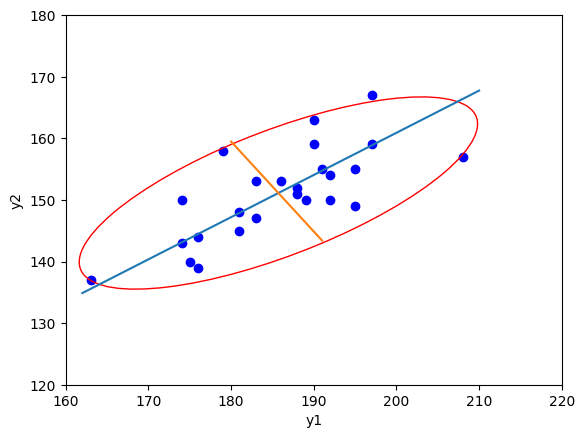

In [ ]:
from matplotlib.patches import Ellipse

x1 = np.linspace(162, 210, 100)
z1 = 0.565/0.825*(x1 - 185.72) + 151.12

x2 = np.linspace(180,191, 100)
z2 = -0.825/0.565*(x2 - 185.72) + 151.12

fig, ax = plt.subplots()

plt.plot(x1,z1)
plt.plot(x2,z2)
plt.scatter(data["y1"], data["y2"], c ="blue")

ellipse = Ellipse((ybar[0], ybar[1]), width=11.5 * 4.7,
                  height=4.3 * 4.5,
                  angle=np.rad2deg(np.arctan(S.iloc[0,1] / S.iloc[0,0])),
                  edgecolor='red', facecolor='none', label='Ellipse')

# Add the ellipse to the plot
ax.add_patch(ellipse)

# Set x and y limits
plt.xlim(160, 220)
plt.ylim(120, 180)

# Add labels and legend
plt.xlabel('y1')
plt.ylabel('y2')

# To show the plot
plt.show()

## Example 12.2.2

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t8.3.xlsx'
data = pd.read_excel(url)

data = data[data['Group'].isin([2,3])].iloc[:,1:]
data.reset_index(inplace = True,drop = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WDIM    60 non-null     float64
 1   CIRCUM  60 non-null     float64
 2   FBEYE   60 non-null     float64
 3   EYEHD   60 non-null     float64
 4   EARHD   60 non-null     float64
 5   JAW     60 non-null     float64
dtypes: float64(6)
memory usage: 2.9 KB


In [ ]:
S = data.cov()
print(round(S,3))

         WDIM  CIRCUM  FBEYE  EYEHD  EARHD    JAW
WDIM    0.370   0.602  0.149  0.044  0.107  0.209
CIRCUM  0.602   2.653  0.808  0.665  0.102  0.380
FBEYE   0.149   0.808  0.458  0.011 -0.013  0.120
EYEHD   0.044   0.665  0.011  1.474  0.252 -0.054
EARHD   0.107   0.102 -0.013  0.252  0.488 -0.036
JAW     0.209   0.380  0.120 -0.054 -0.036  0.324


In [ ]:
total = np.trace(S)
print(total)

5.766652542372881


In [ ]:
E = np.sort(eig(S)[0])[::-1]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total)
  cumulative.append(temp)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Proportion of Variance" : np.round(prop,3),
    "Cumulative Proportion" : np.round(cumulative,3)
})
df

,Eigenvalue,Proportion of Variance,Cumulative Proportion
0,3.345,0.580,0.580
1,1.377,0.239,0.819
2,0.476,0.083,0.901
3,0.325,0.056,0.958
4,0.155,0.027,0.985
5,0.089,0.015,1.000


In [ ]:
e = eig(S)[1]
a1 = e[:,0]*(-1)
a2 = e[:,1]
df = pd.DataFrame({
    " " : data.columns,
    "a1" : np.round(a1,3),
    "a2" : np.round(a2,3)
})
df

,,a1,a2
0,WDIM,0.206,-0.139
1,CIRCUM,0.874,-0.217
2,FBEYE,0.262,-0.230
3,EYEHD,0.322,0.893
4,EARHD,0.065,0.223
5,JAW,0.128,-0.185


# 12.4 PLOTTING OF PRINCIPAL COMPONENTS

## Example 12.4(a)

In [ ]:
print("a1 = ",a1)
print("a2 = ",a2)

a1 =  [0.20623138 0.87445478 0.26178666 0.32204603 0.06454261 0.12800707]
a2 =  [-0.13895707 -0.21660578 -0.22954568  0.89282852  0.22259938 -0.18544108]


In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data.iloc[i]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_normal = z1_value-z1_bar
z2_normal = z2_value-z2_bar
df = pd.DataFrame({
    "z1" : z1_normal,
    "z2" : z2_normal
})
df.head()

,z1,z2
0,2.442177,-1.148156
1,2.606556,1.864138
2,2.222768,0.372563
3,-1.045819,1.079669
4,-0.176366,-1.395278


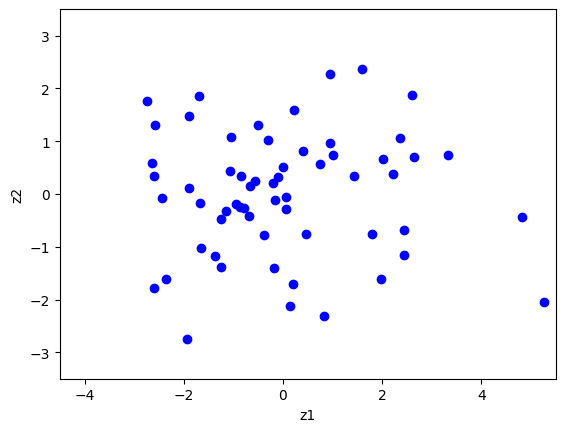

In [ ]:
plt.scatter(z1_normal,z2_normal, c ="blue")

# Set x and y limits
plt.xlim(-4.5, 5.5)
plt.ylim(-3.5, 3.5)

# Add labels and legend
plt.xlabel('z1')
plt.ylabel('z2')

# To show the plot
plt.show()

## Example 12.4(b)

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t3.8.xlsx'
data = pd.read_excel(url)
data.head()

,y1,y2,y3,y4
0,47.8,48.8,49.0,49.7
1,46.4,47.3,47.7,48.4
2,46.3,46.8,47.8,48.5
3,45.1,45.3,46.1,47.2
4,47.6,48.5,48.9,49.3


In [ ]:
S = data.cov()
evalue = eig(S)[0]
evect = eig(S)[1]

In [ ]:
df = pd.DataFrame({
    "Number" : [1,2,3,4],
    "Value" : np.round(evalue,2)
})
df

,Number,Value
0,1,25.09
1,2,1.74
2,3,0.22
3,4,0.11


In [ ]:
a1 = evect[:,0]
a2 = evect[:,1]
df = pd.DataFrame({
    "Variable" : ["AGE 8","AGE 8.5","AGE 9","AGE 9.5"],
    "a1" : np.round(a1,3),
    "a2" : np.round(a2,3)
})
df

,Variable,a1,a2
0,AGE 8,0.474,0.593
1,AGE 8.5,0.492,0.405
2,AGE 9,0.515,-0.304
3,AGE 9.5,0.518,-0.626


In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data.iloc[i]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_normal = z1_value-z1_bar
z2_normal = z2_value-z2_bar
df = pd.DataFrame({
    "z1" : z1_normal,
    "z2" : z2_normal
})
df.head()

,z1,z2
0,-2.525733,0.730957
1,-5.269862,0.501453
2,-5.459960,0.146522
3,-8.315345,0.157112
4,-3.026676,0.771529


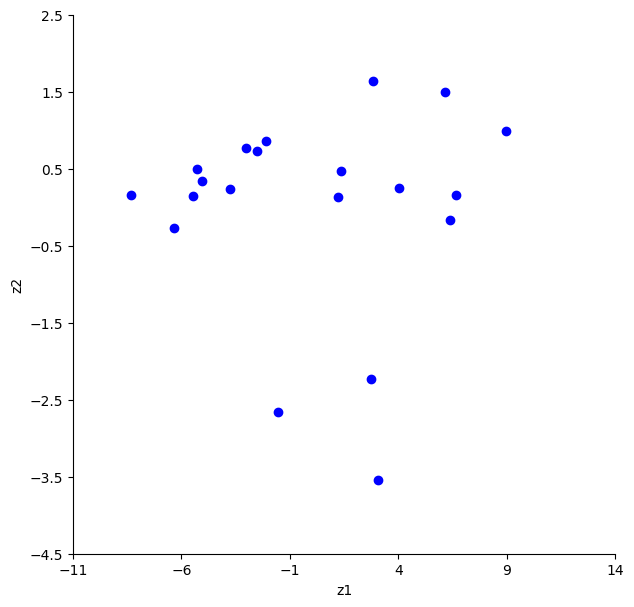

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

plt.scatter(z1_normal,z2_normal, c ="blue")

xmin, xmax, ymin, ymax = -11, 14, -4.5, 2.5

x_ticks = np.arange(xmin, xmax+1, 5)
y_ticks = np.arange(ymin, ymax+1, 1)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y limits
plt.xlim(-11, 14)
plt.ylim(-4.5, 2.5)

# Add labels and legend
plt.xlabel('z1')
plt.ylabel('z2')

# To show the plot
plt.show()

#**12.5 PRINCIPAL COMPONENTS FROM THE CORRELATION MATRIX**

## Example 12.4(d)

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t.j.xlsx'
data = pd.read_excel(url)
data.head()

,LENGTH,WIDTH,FORWING,HINWING,SPIRAC,ANTSEG 1,ANTSEG 2,ANTSEG 3,ANTSEG 4,ANTSEG 5,ANTSPIN,TARSUS 3,TIBIA 3,FEMUR 3,ROSTRUM,OVIPOS,OVSPIN,FOLD,HOOKS
0,21.2,11.0,7.5,4.8,5,2.0,2.0,2.8,2.8,3.3,3,4.4,4.5,3.6,7.0,4.0,8,0,3.0
1,20.2,10.0,7.5,5.0,5,2.3,2.1,3.0,3.0,3.2,5,4.2,4.5,3.5,7.6,4.2,8,0,3.0
2,20.2,10.0,7.0,4.6,5,1.9,2.1,3.0,2.5,3.3,1,4.2,4.4,3.3,7.0,4.0,6,0,3.0
3,22.5,8.8,7.4,4.7,5,2.4,2.1,3.0,2.7,3.5,5,4.2,4.4,3.6,6.8,4.1,6,0,3.0
4,20.6,11.0,8.0,4.8,5,2.4,2.0,2.9,2.7,3.0,4,4.2,4.7,3.5,6.7,4.0,6,0,3.0


In [ ]:
R = data.corr()
R

,LENGTH,WIDTH,FORWING,HINWING,SPIRAC,ANTSEG 1,ANTSEG 2,ANTSEG 3,ANTSEG 4,ANTSEG 5,ANTSPIN,TARSUS 3,TIBIA 3,FEMUR 3,ROSTRUM,OVIPOS,OVSPIN,FOLD,HOOKS
LENGTH,1.000000,0.910769,0.925995,0.893767,0.528328,0.800630,0.851535,0.765356,0.820378,0.838595,-0.459269,0.913159,0.925290,0.934818,0.871145,0.685612,0.360103,-0.645262,0.665953
WIDTH,0.910769,1.000000,0.940674,0.944265,0.486822,0.821208,0.864693,0.810241,0.862839,0.877618,-0.495890,0.941996,0.961296,0.954125,0.898731,0.651685,0.305095,-0.711570,0.729077
FORWING,0.925995,0.940674,1.000000,0.932863,0.542529,0.856223,0.885943,0.834020,0.861595,0.862645,-0.521723,0.939921,0.955652,0.945618,0.882040,0.693654,0.356084,-0.666880,0.746300
HINWING,0.893767,0.944265,0.932863,1.000000,0.498585,0.833486,0.889456,0.846897,0.849975,0.880862,-0.488162,0.945093,0.952046,0.949135,0.908109,0.622681,0.272499,-0.735768,0.777149
SPIRAC,0.528328,0.486822,0.542529,0.498585,1.000000,0.703294,0.718538,0.240283,0.461750,0.566554,-0.174078,0.515665,0.494280,0.452223,0.551478,0.814965,0.745672,-0.232781,0.285262
ANTSEG 1,0.800630,0.821208,0.856223,0.833486,0.703294,1.000000,0.923323,0.677738,0.752061,0.835515,-0.317499,0.846053,0.849250,0.822901,0.830822,0.812160,0.553173,-0.503616,0.499199
ANTSEG 2,0.851535,0.864693,0.885943,0.889456,0.718538,0.923323,1.000000,0.734874,0.793118,0.912730,-0.383484,0.906829,0.913618,0.885637,0.891141,0.855216,0.567226,-0.501907,0.591690
ANTSEG 3,0.765356,0.810241,0.834020,0.846897,0.240283,0.677738,0.734874,1.000000,0.713415,0.756031,-0.455578,0.846170,0.864457,0.873613,0.780164,0.417337,0.063754,-0.698798,0.750464
ANTSEG 4,0.820378,0.862839,0.861595,0.849975,0.461750,0.752061,0.793118,0.713415,1.000000,0.804906,-0.355806,0.847935,0.876649,0.882602,0.817586,0.620091,0.300081,-0.665620,0.670874
ANTSEG 5,0.838595,0.877618,0.862645,0.880862,0.566554,0.835515,0.912730,0.756031,0.804906,1.000000,-0.370851,0.901521,0.901415,0.890881,0.847890,0.711834,0.383650,-0.628707,0.668203


In [ ]:
total = sum(eig(R)[0])
E = eig(R)[0]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total*100)
  cumulative.append(temp*100)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Percent of Variance" : np.round(prop,1),
    "Cumulative Proportion" : np.round(cumulative,1)
})
df

,Eigenvalue,Percent of Variance,Cumulative Proportion
0,13.800,72.6,72.6
1,2.350,12.4,85.0
2,0.753,4.0,89.0
3,0.518,2.7,91.7
4,0.290,1.5,93.2
5,0.265,1.4,94.6
6,0.172,0.9,95.5
7,0.166,0.9,96.4
8,0.145,0.8,97.2
9,0.133,0.7,97.9


In [ ]:
evect = eig(R)[1]
ev = evect[:,:4]
m = [12,16,10,4]
a = dict()
for i in range(4) :
  a[i] = ev[:,i]/ev[:,i][m[i]]
df = pd.DataFrame({
    "Variable" : data.columns,
    "a1" : np.round(a[0],2),
    "a2" : np.round(a[1],2),
    "a3" : np.round(a[2],2),
    "a4" : np.round(a[3],2)
})
df

,Variable,a1,a2,a3,a4
0,LENGTH,0.95,-0.03,-0.00,-0.18
1,WIDTH,0.98,-0.13,0.01,-0.13
2,FORWING,0.99,-0.07,-0.06,-0.11
3,HINWING,0.98,-0.16,0.03,0.02
4,SPIRAC,0.62,0.74,-0.21,1.00
5,ANTSEG 1,0.91,0.32,0.04,0.03
6,ANTSEG 2,0.96,0.29,0.01,-0.05
7,ANTSEG 3,0.86,-0.41,0.12,-0.37
8,ANTSEG 4,0.90,-0.08,0.17,0.06
9,ANTSEG 5,0.94,0.05,0.11,0.06


In [ ]:
data_standar = data.copy()
for i in range(19) :
  data_standar.iloc[:,i] = (data_standar.iloc[:,i]-data_standar.iloc[:,i].mean())/data_standar.iloc[:,i].std()

In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data_standar.iloc[i]
  z1_value.append(cek @ a[0])
  z2_value.append(cek @ a[1])
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_value = np.array(z1_value)/3.818175
z2_value = np.array(z2_value)/2.012882
df = pd.DataFrame({
    "z1" : z1_value,
    "z2" : z2_value
})
df.head()

,z1,z2
0,5.436989,-1.222756
1,5.636558,-0.671505
2,4.866068,-2.006269
3,5.248606,-1.097042
4,5.217734,-1.434100


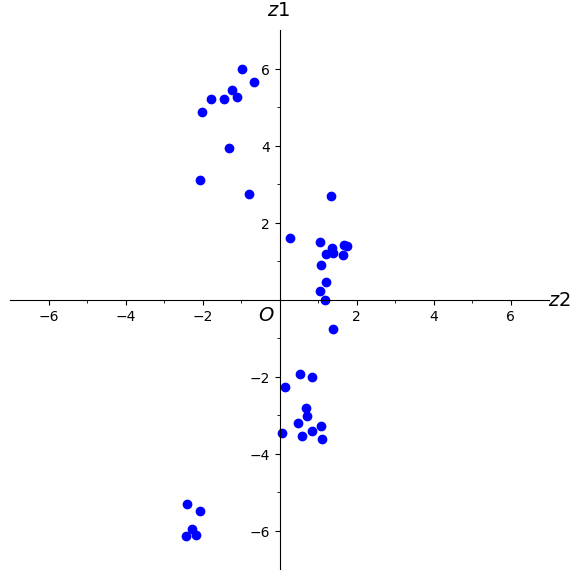

In [ ]:
xmin, xmax, ymin, ymax = -6, 6, -6, 6
ticks_frequency = 2

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$z2$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$z1$', size=14, labelpad=-21, y=1.02, rotation=0)

plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,
         horizontalalignment='center', fontsize=14)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

plt.scatter(z2_value,z1_value, c ="blue")

# # Add labels and legend
# ax.set_xlabel('z2')
# ax.set_ylabel('z1')

# To show the plot
plt.show()

#**12.6 DECIDING HOW MANY COMPONENTS TO RETAIN**

## Example 12.6

In [ ]:
#Method 1
#Retain sufficient components to account for a specified percentage of the total variance, say, 80%.
url = 'https://github.com/alzimna/Anmul/raw/main/data/t8.3.xlsx'
data = pd.read_excel(url)

data = data[data['Group'].isin([2,3])].iloc[:,1:]
data.reset_index(inplace = True,drop = True)

S = data.cov()

total = np.trace(S)

E = np.sort(eig(S)[0])[::-1]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total)
  cumulative.append(temp)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Proportion of Variance" : np.round(prop,3),
    "Cumulative Proportion" : np.round(cumulative,3)
})
df

,Eigenvalue,Proportion of Variance,Cumulative Proportion
0,3.345,0.580,0.580
1,1.377,0.239,0.819
2,0.476,0.083,0.901
3,0.325,0.056,0.958
4,0.155,0.027,0.985
5,0.089,0.015,1.000


In [ ]:
# Method 2
# Retain the components whose eigenvalues are greater than the average of the eigenvalues,  For a correlation matrix, this average is 1.
lambdabar = E.mean()
lambdabar

0.9611087570621476

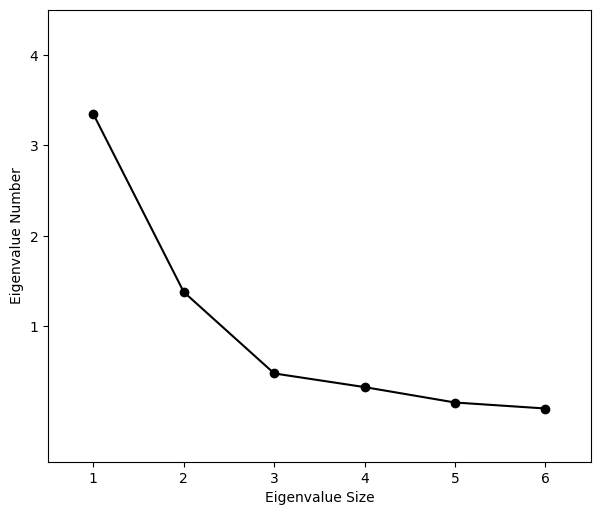

In [ ]:
#Method 3
#Use the scree graph, a plot of λi versus i, and look for a natural break between
#the “large”eigenvalues and the “small”eigenvalues.

xmin, xmax, ymin, ymax = 1,6, 0, 4

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-0.5, xmax+0.5), ylim=(ymin-0.5, ymax+0.5), aspect='equal')


x_ticks = np.arange(xmin, xmax+1, 1)
y_ticks = np.arange(ymin, ymax+1, 1)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

x = [i for i in range(1,7)]
plt.plot(x,E,c = "black",marker = 'o')

# Add labels and legend
ax.set_xlabel('Eigenvalue Size')
ax.set_ylabel('Eigenvalue Number')

# To show the plot
plt.show()

In [ ]:
#Method 4
# test the significance of the “larger”components, that is,
# the components corresponding to the larger eigenvalue
import scipy

u_value = []
nu_value = []
crit_value = []
for k in range(6,1,-1) :
  lambdabar = E[6-k:].mean()
  u = (60-23/6)*(k*np.log(lambdabar)-sum(np.log(E[6-k:])))
  nu = (k-1)*(k+2)//2
  q = 0.95
  crit = scipy.stats.chi2.ppf(q, nu)
  u_value.append(u)
  nu_value.append(nu)
  crit_value.append(crit)
  # print(lambdabar)

In [ ]:
df = pd.DataFrame({
    "u" : np.round(u_value,2),
    "df" : nu_value,
    "Chi_square" : np.round(crit_value,2)
})
df

,u,df,Chi_square
0,246.45,20,31.41
1,124.08,14,23.68
2,44.07,9,16.92
3,23.75,5,11.07
4,4.33,2,5.99


# **12.8 INTERPRETATION OF PRINCIPAL COMPONENTS**

## Example 12.8.3

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t8.3.xlsx'
data = pd.read_excel(url)

data = data[data['Group'].isin([2,3])].iloc[:,1:]
data.reset_index(inplace = True,drop = True)
S = data.cov()
total = np.trace(S)
e = eig(S)[1]
a1 = e[:,0]*(-1)
a2 = e[:,1]
z1_value = []
z2_value = []
for i in range(60) :
  cek = data.iloc[i,:]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z = pd.DataFrame({
    "z1" : z1_value,
    "z2" : z2_value
})

data_and_component = pd.concat([data,z],axis = 1)

In [ ]:
R = data_and_component.corr()
ryz1 = np.round(R.iloc[:-2,-2],2)
ryz2 = np.round(R.iloc[:-2,-1],2)
Ryz = []
for i in range(6) :
  cek = R.iloc[i,-2:]
  Rzz = R.iloc[-2:,-2:]
  Ryz.append(round(t(cek) @ Rzz @ cek,2))

In [ ]:
df = pd.DataFrame({
    "a1" : a1,
    "a2" : a2,
    "ryiz1" : ryz1,
    "ryiz2" : ryz2,
    "R^2yiz" : Ryz
})
df

,a1,a2,ryiz1,ryiz2,R^2yiz
WDIM,0.206231,-0.138957,0.62,-0.27,0.46
CIRCUM,0.874455,-0.216606,0.98,-0.16,0.99
FBEYE,0.261787,-0.229546,0.71,-0.40,0.66
EYEHD,0.322046,0.892829,0.49,0.86,0.98
EARHD,0.064543,0.222599,0.17,0.37,0.17
JAW,0.128007,-0.185441,0.41,-0.38,0.32


#Exercise 12.8

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/t3.4.xlsx'
data = pd.read_excel(url).iloc[:,1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_1     46 non-null     float64
 1   y_2     46 non-null     int64  
 2   x_1     46 non-null     int64  
 3   x_2     46 non-null     int64  
 4   x_3     46 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.9 KB


**PCA dengan S**

In [ ]:
S = data.cov()
total = np.trace(S)
E = np.sort(eig(S)[0])[::-1]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total)
  cumulative.append(temp)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Proportion of Variance" : np.round(prop,3),
    "Cumulative Proportion" : np.round(cumulative,3)
})
df

,Eigenvalue,Proportion of Variance,Cumulative Proportion
0,3466.182,0.609,0.609
1,1264.471,0.222,0.831
2,895.268,0.157,0.988
3,69.335,0.012,1.000
4,0.011,0.000,1.000


Dari sini diperoleh dua eigen value memberikan proporsi sebesar 83% sehingga cukup untuk mewakili data. Berikut ini loading yang didapat dengan menggunakan $S$

In [ ]:
e = eig(S)[1]
a1 = e[:,0]
a2 = e[:,1]
df = pd.DataFrame({
    " " : data.columns,
    "a1" : np.round(a1,3),
    "a2" : np.round(a2,3)
})
df

,,a1,a2
0,y_1,0.000,0.001
1,y_2,-0.008,-0.017
2,x_1,0.155,-0.638
3,x_2,0.743,-0.428
4,x_3,0.651,0.640


In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data.iloc[i]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_normal = z1_value-z1_bar
z2_normal = z2_value-z2_bar
df = pd.DataFrame({
    "z1" : z1_normal,
    "z2" : z2_normal
})
df.head()

,z1,z2
0,-60.620307,-16.609897
1,-62.650515,42.298836
2,-19.872586,30.445411
3,29.532789,-14.965042
4,77.678585,10.941535


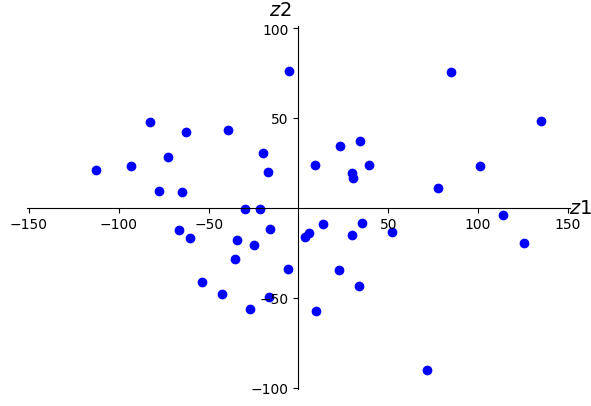

In [ ]:
xmin, xmax, ymin, ymax = -150, 150, -100, 100
ticks_frequency = 50

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$z1$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$z2$', size=14, labelpad=-21, y=1.02, rotation=0)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
# ax.set_xticks(np.arange(xmin, xmax+1))
# ax.set_yticks(np.arange(ymin, ymax+1))

plt.scatter(z1_normal,z2_normal, c ="blue")

# # Add labels and legend
# ax.set_xlabel('z2')
# ax.set_ylabel('z1')

# To show the plot
plt.show()

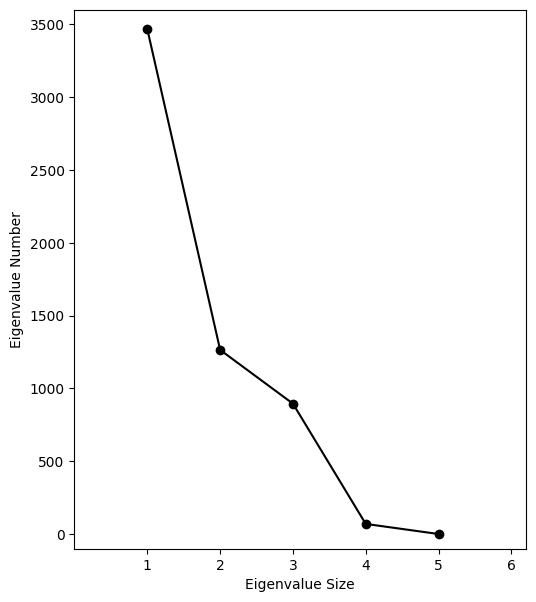

In [ ]:
#Method 3
#Use the scree graph, a plot of λi versus i, and look for a natural break between
#the “large”eigenvalues and the “small”eigenvalues.

xmin, xmax, ymin, ymax = -500,2600, -100, 3600

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')


ticks = np.arange(0, 2501, 500)  # Adjust the step size as needed
labels = [str(i) for i in range(1, len(ticks) + 1)]
plt.xticks(ticks, labels)
# x_ticks = np.arange(xmin-1, xmax+1, 1)
# y_ticks = np.arange(ymin-1, ymax+1, 1)
# ax.set_xticks(x_ticks[x_ticks != 0])
# ax.set_yticks(y_ticks[y_ticks != 0])

x = [i for i in range(5)]
plt.plot(np.array(x)*500,E,c = "black",marker = 'o')

# Add labels and legend
ax.set_xlabel('Eigenvalue Size')
ax.set_ylabel('Eigenvalue Number')

# To show the plot
plt.show()

Dari scree plot diatas terlihat bahwa ada 2 nilai eigen yang sudah menyumbang proporsi tertinggi. Selanjutnya akan diuji signifikansi dari komponen yang lebih besar dari suatu nilai $k$ dengan $H_0 : \gamma_{p-k+1} = \gamma_{p-k+2} = \dots = \gamma_{p}$ dengan statistik uji

$$u = \left(n-\frac{2p+11}{6}\right)\left(k \ln \overline{\lambda}-\sum_{i=p-k+1}^p \ln \lambda_i\right)
$$

$H_0$ akan ditolak jika $u \geq \chi^2_{\alpha,\nu}$

In [ ]:
#Method 4
# test the significance of the “larger”components, that is,
# the components corresponding to the larger eigenvalue
import scipy

u_value = []
nu_value = []
crit_value = []
for k in range(5,1,-1) :
  lambdabar = E[5-k:].mean()
  u = (46-21/6)*(k*np.log(lambdabar)-sum(np.log(E[5-k:])))
  nu = (k-1)*(k+2)//2
  q = 0.95
  crit = scipy.stats.chi2.ppf(q, nu)
  u_value.append(u)
  nu_value.append(nu)
  crit_value.append(crit)
  # print(lambdabar)

In [ ]:
df = pd.DataFrame({
    "u" : np.round(u_value,2),
    "df" : nu_value,
    "Chi_square" : np.round(crit_value,2)
})
df

,u,df,Chi_square
0,566.64,14,23.68
1,492.40,9,16.92
2,457.10,5,11.07
3,311.32,2,5.99


Dari hasil diatas diperoleh bahwa $H_0$ tidak ada yang diterima sehingga harus dipertahankan kelima komponennya

**PCA dengan R**

In [ ]:
R = data.cov()
total = np.trace(R)
E = np.sort(eig(S)[0])[::-1]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total)
  cumulative.append(temp)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Proportion of Variance" : np.round(prop,3),
    "Cumulative Proportion" : np.round(cumulative,3)
})
df

,Eigenvalue,Proportion of Variance,Cumulative Proportion
0,3466.182,0.609,0.609
1,1264.471,0.222,0.831
2,895.268,0.157,0.988
3,69.335,0.012,1.000
4,0.011,0.000,1.000


Dari sini diperoleh dua eigen value memberikan proporsi sebesar 83% sehingga cukup untuk mewakili data. Berikut ini loading yang didapat dengan menggunakan $R$

In [ ]:
e = eig(R)[1]
a1 = e[:,0]
a2 = e[:,1]
df = pd.DataFrame({
    " " : data.columns,
    "a1" : np.round(a1,3),
    "a2" : np.round(a2,3)
})
df

,,a1,a2
0,y_1,0.000,0.001
1,y_2,-0.008,-0.017
2,x_1,0.155,-0.638
3,x_2,0.743,-0.428
4,x_3,0.651,0.640


In [ ]:
data_std = data.copy()
for i in range(5) :
  data_std.iloc[:,i] = (data.iloc[:,i]-data.iloc[:,i].mean())/data.iloc[:,i].std()

In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data_std.iloc[i]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_normal = z1_value
z2_normal = z2_value
df = pd.DataFrame({
    "z1" : z1_normal,
    "z2" : z2_normal
})
df.head()

,z1,z2
0,-1.243613,-0.448015
1,-1.381838,1.156824
2,-0.445630,0.738739
3,0.635931,-0.390439
4,1.599524,0.367417


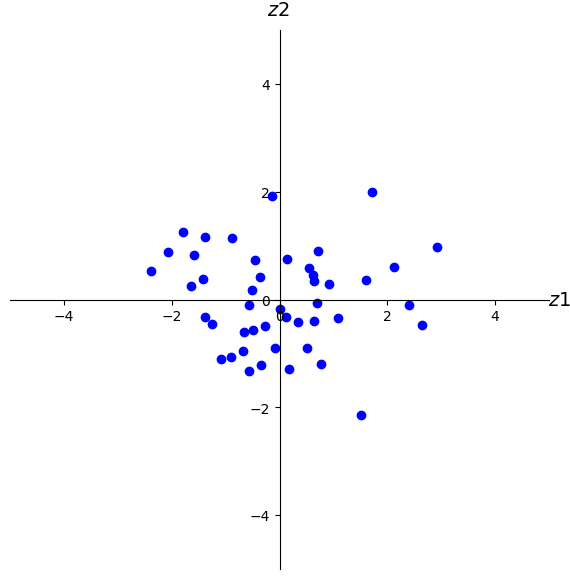

In [ ]:
xmin, xmax, ymin, ymax = -4, 4, -4, 4
ticks_frequency = 1

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$z1$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$z2$', size=14, labelpad=-21, y=1.02, rotation=0)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
# ax.set_xticks(x_ticks[x_ticks != 0])
# ax.set_yticks(y_ticks[y_ticks != 0])
# ax.set_xticks(np.arange(xmin, xmax+1))
# ax.set_yticks(np.arange(ymin, ymax+1))

plt.scatter(z1_normal,z2_normal, c ="blue")

# # Add labels and legend
# ax.set_xlabel('z2')
# ax.set_ylabel('z1')

# To show the plot
plt.show()

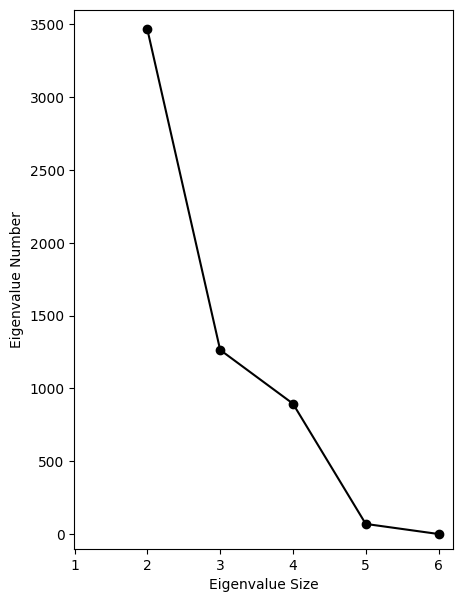

In [ ]:
#Method 3
#Use the scree graph, a plot of λi versus i, and look for a natural break between
#the “large”eigenvalues and the “small”eigenvalues.

xmin, xmax, ymin, ymax = 0,2600, -100, 3600

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')


ticks = np.arange(0, 2501, 500)  # Adjust the step size as needed
labels = [str(i) for i in range(1, len(ticks) + 1)]
plt.xticks(ticks, labels)
# x_ticks = np.arange(xmin-1, xmax+1, 1)
# y_ticks = np.arange(ymin-1, ymax+1, 1)
# ax.set_xticks(x_ticks[x_ticks != 0])
# ax.set_yticks(y_ticks[y_ticks != 0])

x = [i for i in range(1,6)]
plt.plot(np.array(x)*500,E,c = "black",marker = 'o')

# Add labels and legend
ax.set_xlabel('Eigenvalue Size')
ax.set_ylabel('Eigenvalue Number')

# To show the plot
plt.show()

Dari scree plot diatas terlihat bahwa ada 2 nilai eigen yang sudah menyumbang proporsi tertinggi. Selanjutnya akan diuji signifikansi dari komponen yang lebih besar dari suatu nilai $k$ dengan $H_0 : \gamma_{p-k+1} = \gamma_{p-k+2} = \dots = \gamma_{p}$ dengan statistik uji

$$u = \left(n-\frac{2p+11}{6}\right)\left(k \ln \overline{\lambda}-\sum_{i=p-k+1}^p \ln \lambda_i\right)
$$

$H_0$ akan ditolak jika $u \geq \chi^2_{\alpha,\nu}$

In [ ]:
#Method 4
# test the significance of the “larger”components, that is,
# the components corresponding to the larger eigenvalue
import scipy

u_value = []
nu_value = []
crit_value = []
for k in range(5,1,-1) :
  lambdabar = E[5-k:].mean()
  u = (46-21/6)*(k*np.log(lambdabar)-sum(np.log(E[5-k:])))
  nu = (k-1)*(k+2)//2
  q = 0.95
  crit = scipy.stats.chi2.ppf(q, nu)
  u_value.append(u)
  nu_value.append(nu)
  crit_value.append(crit)
  # print(lambdabar)

In [ ]:
df = pd.DataFrame({
    "u" : np.round(u_value,2),
    "df" : nu_value,
    "Chi_square" : np.round(crit_value,2)
})
df

,u,df,Chi_square
0,566.64,14,23.68
1,492.40,9,16.92
2,457.10,5,11.07
3,311.32,2,5.99


Dari hasil diatas diperoleh bahwa $H_0$ tidak ada yang diterima sehingga harus dipertahankan kelima komponennya. Hal ini bertentangan dengan metode metode diatas

# Konteksual

Diberikan data antropometri dari 100 mahasiswa yang terdiri dari 11 variabel yaitu

Keterangan :
1.   PTT : Panjang Telapak Tangan
2.   PIJ : Panjang Ibu Jari
3.   LIJ : Lebar Ibu Jari
4.   TIJ : Tebal Ibu Jari
5.   PJL : Panjang Jari Telunjuk
6.   LJL : Lebar jari telunnjuk
7.   TJL : Tebal jari telunjuk
8.   LTM : Lebar Telapak Tangan/Metacarpal
9.   LTB : Lebar Telapak Tangan/Sampai Ibu Jari
10. TTM : Tebal Telapak Tangan/Metacarpal
11. TTB : Tebal Telapak Tangan/Sampai Ibu Jari

In [ ]:
url = 'https://github.com/alzimna/Anmul/raw/main/data/antro.xlsx'
data = pd.read_excel(url).iloc[:,4:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tinggi Badan  100 non-null    int64  
 1   Berat Badan   100 non-null    int64  
 2   PTT           100 non-null    float64
 3   PIJ           100 non-null    float64
 4   LIJ           100 non-null    float64
 5   TIJ           100 non-null    float64
 6   PJL           100 non-null    float64
 7   LJL           100 non-null    float64
 8   TJL           100 non-null    float64
 9   LTM           100 non-null    float64
 10  LTB           100 non-null    float64
 11  TTM           100 non-null    float64
 12  TTB           100 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 10.3 KB


In [ ]:
S = data.cov()
total = np.trace(S)
E = np.sort(eig(S)[0])[::-1]
prop = []
cumulative = []
temp = 0
for i in range(len(E)) :
  temp += E[i]/total
  prop.append(E[i]/total)
  cumulative.append(temp)
df = pd.DataFrame({
    "Eigenvalue" : np.round(E,3),
    "Proportion of Variance" : np.round(prop,3),
    "Cumulative Proportion" : np.round(cumulative,3)
})
df

,Eigenvalue,Proportion of Variance,Cumulative Proportion
0,134.348,0.821,0.821
1,28.861,0.176,0.998
2,0.126,0.001,0.998
3,0.067,0.000,0.999
4,0.047,0.000,0.999
5,0.034,0.000,0.999
6,0.027,0.000,1.000
7,0.020,0.000,1.000
8,0.016,0.000,1.000
9,0.014,0.000,1.000


Dari sini diperoleh dua eigen value memberikan proporsi sebesar 83% sehingga cukup untuk mewakili data. Berikut ini loading yang didapat dengan menggunakan $S$

In [ ]:
e = eig(S)[1]
a1 = e[:,0]*(-1)
a2 = e[:,1]
df = pd.DataFrame({
    " " : data.columns,
    "a1" : np.round(a1,3),
    "a2" : np.round(a2,3)
})
df

,,a1,a2
0,Tinggi Badan,0.544,0.833
1,Berat Badan,0.835,-0.548
2,PTT,0.031,0.052
3,PIJ,0.026,0.031
4,LIJ,0.018,0.009
5,TIJ,0.017,-0.001
6,PJL,0.014,0.025
7,LJL,0.017,-0.002
8,TJL,0.017,-0.003
9,LTM,0.034,0.031


In [ ]:
z1_value = []
z2_value = []
for i in range(len(data)) :
  cek = data.iloc[i]
  z1_value.append(cek @ a1)
  z2_value.append(cek @ a2)
z1_bar = np.mean(z1_value)
z2_bar = np.mean(z2_value)
z1_normal = z1_value-z1_bar
z2_normal = z2_value-z2_bar
df = pd.DataFrame({
    "z1" : z1_normal,
    "z2" : z2_normal
})
df.head()

,z1,z2
0,2.260335,8.061700
1,13.454625,6.837747
2,14.343332,6.337250
3,-5.745804,4.964118
4,9.816560,10.428982


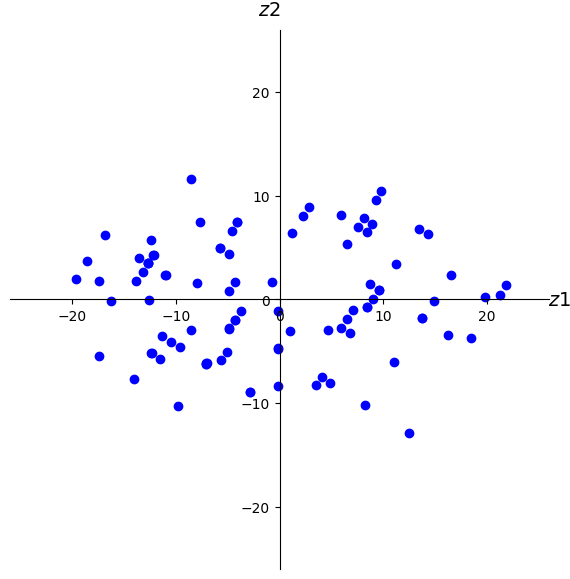

In [ ]:
xmin, xmax, ymin, ymax = -25, 25, -25, 25
ticks_frequency = 5

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$z1$', size=14, labelpad=-24, x=1.02)
ax.set_ylabel('$z2$', size=14, labelpad=-21, y=1.02, rotation=0)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
# ax.set_xticks(x_ticks[x_ticks != 0])
# ax.set_yticks(y_ticks[y_ticks != 0])
# ax.set_xticks(np.arange(xmin, xmax+1))
# ax.set_yticks(np.arange(ymin, ymax+1))

plt.scatter(z1_normal,z2_normal, c ="blue")

# # Add labels and legend
# ax.set_xlabel('z2')
# ax.set_ylabel('z1')

# To show the plot
plt.show()

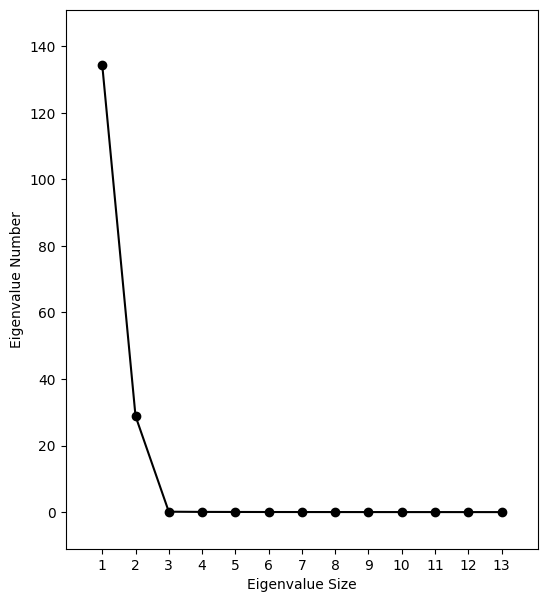

In [ ]:
#Method 3
#Use the scree graph, a plot of λi versus i, and look for a natural break between
#the “large”eigenvalues and the “small”eigenvalues.

xmin, xmax, ymin, ymax = 0,140, -10, 150

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')


ticks = np.arange(10, 140, 10)  # Adjust the step size as needed
labels = [str(i) for i in range(1, len(ticks) + 1)]
plt.xticks(ticks, labels)
# x_ticks = np.arange(xmin-1, xmax+1, 1)
# y_ticks = np.arange(ymin-1, ymax+1, 1)
# ax.set_xticks(x_ticks[x_ticks != 0])
# ax.set_yticks(y_ticks[y_ticks != 0])

x = [i for i in range(1,14)]
plt.plot(np.array(x)*10,E,c = "black",marker = 'o')

# Add labels and legend
ax.set_xlabel('Eigenvalue Size')
ax.set_ylabel('Eigenvalue Number')

# To show the plot
plt.show()

Dari scree plot diatas terlihat bahwa ada 2 nilai eigen yang sudah menyumbang proporsi tertinggi. Selanjutnya akan diuji signifikansi dari komponen yang lebih besar dari suatu nilai $k$ dengan $H_0 : \gamma_{p-k+1} = \gamma_{p-k+2} = \dots = \gamma_{p}$ dengan statistik uji

$$u = \left(n-\frac{2p+11}{6}\right)\left(k \ln \overline{\lambda}-\sum_{i=p-k+1}^p \ln \lambda_i\right)
$$

$H_0$ akan ditolak jika $u \geq \chi^2_{\alpha,\nu}$

In [ ]:
#Method 4
# test the significance of the “larger”components, that is,
# the components corresponding to the larger eigenvalue
import scipy

u_value = []
nu_value = []
crit_value = []
for k in range(13,1,-1) :
  lambdabar = E[13-k:].mean()
  u = (100-37/6)*(k*np.log(lambdabar)-sum(np.log(E[13:])))
  nu = (k-1)*(k+2)//2
  q = 0.95
  crit = scipy.stats.chi2.ppf(q, nu)
  u_value.append(u)
  nu_value.append(nu)
  crit_value.append(crit)
  # print(lambdabar)

In [ ]:
df = pd.DataFrame({
    "u" : np.round(u_value,2),
    "df" : nu_value,
    "Chi_square" : np.round(crit_value,2)
})
df

,u,df,Chi_square
0,3089.11,90,113.15
1,1002.84,77,98.48
2,-3478.40,65,84.82
3,-3452.82,54,72.15
4,-3279.41,44,60.48
5,-3048.77,35,49.80
6,-2767.02,27,40.11
7,-2451.27,20,31.41
8,-2096.30,14,23.68
9,-1719.59,9,16.92


Dari hasil diatas diperoleh bahwa dari $k=3$ hipotesis $H_0$ diterima sehingga dapat disimpulkan cukup mempertahankan dua komponen saja

